In [44]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import image as img

In [62]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

In [51]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [19]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [20]:
X_train = train_set.drop('label', axis = 1)
y_train = train_set['label']

### Output classes

In [29]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


### Checking null values

In [24]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [25]:
test_set.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### Normalization

In [26]:
X_train = X_train/255.0
test_set = test_set/255.0

In [27]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test_set = test_set.values.reshape(-1, 28, 28, 1)

### One hot encoding

In [33]:
y_train = to_categorical(y_train, 10)

### Splitting training set into training set and validation set

In [34]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

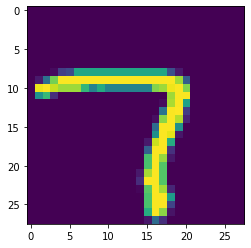

In [46]:
plt.imshow(X_train[random.randint(0, len(X_train))][:,:,0])
plt.show()

### Setting the CNN model

In [61]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu', input_shape=(28, 28, 1)))

model.add(Conv2D(filters=32, kernel_size=(5, 5),
                 padding='Same', activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='Same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='Same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Defining the optimizer

In [63]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

### Compiling the model

In [64]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
trained = model.fit(X_train, y_train, batch_size=86,epochs=3, validation_data=(X_validation, y_validation))